## Spotify Song Popularity Prediction (Outlier Detection and Removal)

Given *data about Spotify songs from 1920-2020*, let's try to predict the **popularity** of a given song. 

We will use a linear regression model to make our predictions, but we will also focus on outlier detection and removal. 

Data source: https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
data = pd.read_csv("data.csv")
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [4]:
data = data.drop(['artists', 'id', 'name', 'release_date'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   danceability      170653 non-null  float64
 4   duration_ms       170653 non-null  int64  
 5   energy            170653 non-null  float64
 6   explicit          170653 non-null  int64  
 7   instrumentalness  170653 non-null  float64
 8   key               170653 non-null  int64  
 9   liveness          170653 non-null  float64
 10  loudness          170653 non-null  float64
 11  mode              170653 non-null  int64  
 12  popularity        170653 non-null  int64  
 13  speechiness       170653 non-null  float64
 14  tempo             170653 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 19.5 MB


In [5]:
data

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,1921,0.98200,0.279,831667,0.211,0,0.878000,10,0.6650,-20.096,1,4,0.0366,80.954
1,0.9630,1921,0.73200,0.819,180533,0.341,0,0.000000,7,0.1600,-12.441,1,5,0.4150,60.936
2,0.0394,1921,0.96100,0.328,500062,0.166,0,0.913000,3,0.1010,-14.850,1,5,0.0339,110.339
3,0.1650,1921,0.96700,0.275,210000,0.309,0,0.000028,5,0.3810,-9.316,1,3,0.0354,100.109
4,0.2530,1921,0.95700,0.418,166693,0.193,0,0.000002,3,0.2290,-10.096,1,2,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,72,0.0881,105.029
170649,0.7340,2020,0.20600,0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,68,0.0605,137.936
170650,0.6370,2020,0.10100,0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,76,0.0809,91.688
170651,0.1950,2020,0.00998,0.671,337147,0.623,1,0.000008,2,0.6430,-7.161,1,70,0.3080,75.055


### Outlier Detection

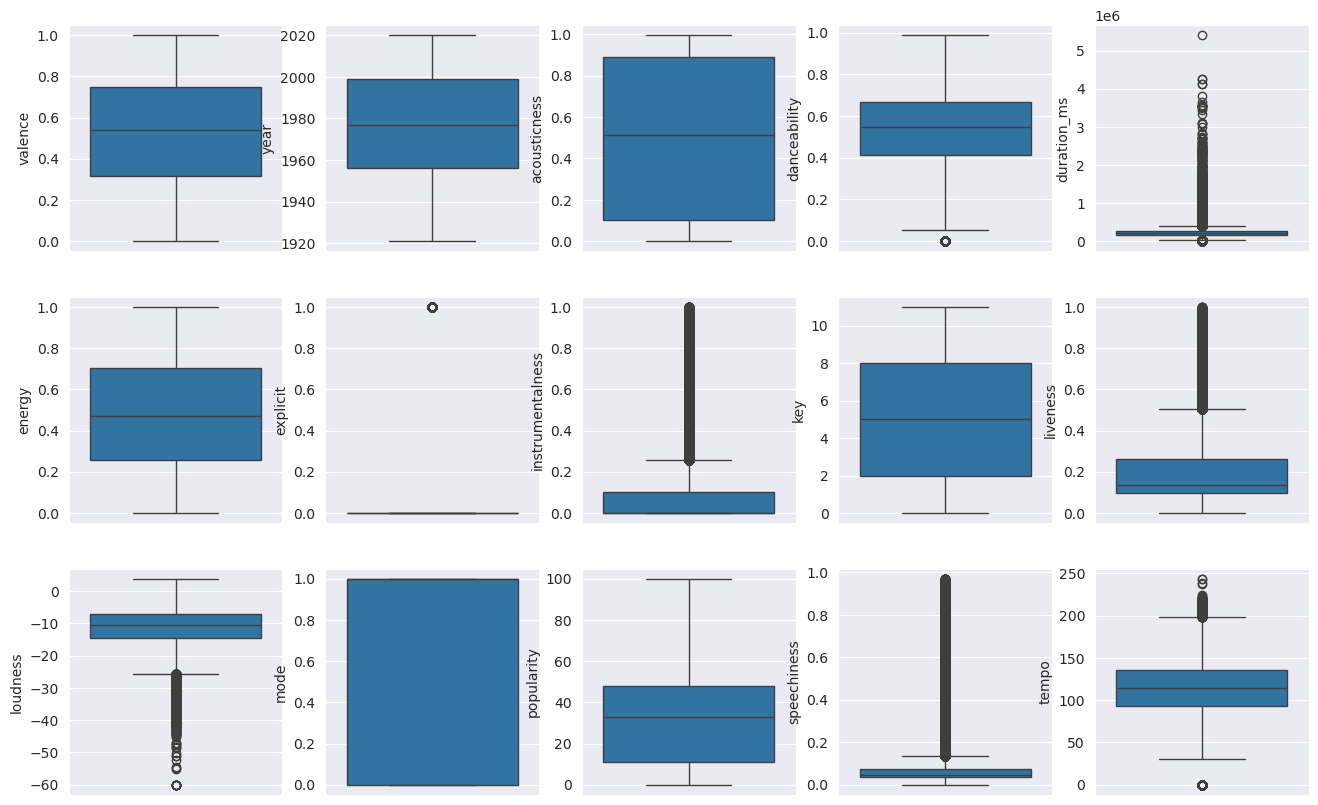

In [6]:
plt.figure(figsize=(16, 10))

for i in range(len(data.columns)):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(data[data.columns[i]])
plt.show()

In [25]:
def get_outlier_counts(df, threshold):
    df = df.copy()
    # Get the Z score for the specified threshold
    threshold_z_score = stats.norm.ppf(threshold)

    # Get the z scores for each value in df
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)

    # Compare df z_scores to the threshold and return the count of outliers in each column
    return (z_score_df > threshold_z_score).sum(axis=0)

In [58]:
get_outlier_counts(data, 0.999999999)

valence               0
year                  0
acousticness          0
danceability          0
duration_ms         501
energy                0
explicit              0
instrumentalness      0
key                   0
liveness              0
loudness             23
mode                  0
popularity            0
speechiness           0
tempo                 0
dtype: int64

In [31]:
def remove_outliers(df, threshold):
    df = df.copy()
    # Get the Z score for the specified threshold
    threshold_z_score = stats.norm.ppf(threshold)

    # Get the z scores for each value in df
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)
    z_score_df = z_score_df > threshold_z_score

    # Return the count of outliers in each column
    outliers = z_score_df.sum(axis=1)
    outliers = outliers > 0
    outlier_indices = df.index[outliers]
    # Drop outlier examples
    df = df.drop(outlier_indices, axis=0).reset_index(drop=True)
    return df

In [48]:
remove_outliers(data, 0.9999)

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.9630,1921,0.73200,0.819,180533,0.341,0,0.000000,7,0.1600,-12.441,1,5,0.4150,60.936
1,0.0394,1921,0.96100,0.328,500062,0.166,0,0.913000,3,0.1010,-14.850,1,5,0.0339,110.339
2,0.1650,1921,0.96700,0.275,210000,0.309,0,0.000028,5,0.3810,-9.316,1,3,0.0354,100.109
3,0.2530,1921,0.95700,0.418,166693,0.193,0,0.000002,3,0.2290,-10.096,1,2,0.0380,101.665
4,0.1960,1921,0.57900,0.697,395076,0.346,0,0.168000,2,0.1300,-12.506,1,6,0.0700,119.824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161256,0.6080,2020,0.08460,0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,72,0.0881,105.029
161257,0.7340,2020,0.20600,0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,68,0.0605,137.936
161258,0.6370,2020,0.10100,0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,76,0.0809,91.688
161259,0.1950,2020,0.00998,0.671,337147,0.623,1,0.000008,2,0.6430,-7.161,1,70,0.3080,75.055


### Preprocessing

In [34]:
def preprocess_inputs(df, outliers=True, threshold=0.95):
    df = df.copy()

    # Remove outliers if specified
    if outliers == False:
        df = remove_outliers(df, threshold)

    # Split df into X and y
    y = df['popularity'].copy()
    X = df.drop('popularity', axis=1).copy()

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=123)

    # Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [61]:
outlier_X_train, outlier_X_test, outlier_y_train, outlier_y_test = preprocess_inputs(data, outliers=True)
X_train, X_test, y_train, y_test = preprocess_inputs(data, outliers=False, threshold=0.999999999)

### Training

In [62]:
# With outliers
outlier_model = LinearRegression()
outlier_model.fit(outlier_X_train, outlier_y_train)

outlier_model_acc = outlier_model.score(outlier_X_test, outlier_y_test)

print("Test Accuracy (Outliers): {:.5f}%".format(outlier_model_acc * 100))

Test Accuracy (Outliers): 75.32179%


In [63]:
# Without outliers
model = LinearRegression()
model.fit(X_train, y_train)

model_acc = model.score(X_test, y_test)

print("Test Accuracy (No Outliers): {:.5f}%".format(model_acc * 100))

Test Accuracy (No Outliers): 75.60811%
